### Importing the required libraries

In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from PIL import Image
import sys
import csv
import cv2 as cv
from tqdm import tqdm

### Getting files names with full path from Dataset

In [34]:
img_files = []
basepath = 'Dataset/'
for entry in os.listdir(basepath):
    if entry in ['+', '-', 'div', 'times']:
        for p in [os.path.join(basepath, entry)]:
            i = 0
            for img in os.listdir(p):
                img_files.append(os.path.join(p, img))
                i += 1
                if (i >= 7000) and (entry == '+'):
                    break
                elif (i >= 7000) and (entry == '-'):
                    break
                elif (i >= 7000) and (entry == 'div'):
                    break
                elif (i >= 7000) and (entry == 'times'):
                    break

In [35]:
# total files
len(img_files)

18119

### Performing image modification and saving it in csv file

In [36]:
# load the original image
myFileList = img_files

for file in tqdm(myFileList):
    img_file = Image.open(file)
    img_file = img_file.resize((28, 28))
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    thresh = 230
    fn = lambda x : 255 if x < thresh else 0
    img_grey = img_file.convert('L').point(fn, mode='1')
    #img_grey = img_file.convert('1')

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = cv.copyMakeBorder(value.copy(),5,5,5,5,cv.BORDER_CONSTANT,value=0)
    value = cv.resize(value.astype('float32'), (28, 28), interpolation = cv.INTER_AREA)
    value = value.flatten().astype('int32')# /255
    #plt.imshow(value.reshape(28, 28) )

    if file.split('/')[1] == '-':
        value = np.append(value, 10)
    elif file.split('/')[1] == '+':
        value = np.append(value, 11)
    elif file.split('/')[1] == 'times':
        value = np.append(value, 12)
    elif file.split('/')[1] == 'div':
        value = np.append(value, 13)
    else:
        value = np.append(value, file.split('/')[1])
     
    with open("mathsymbol.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

100%|██████████| 18119/18119 [01:50<00:00, 163.79it/s]


### Exploring the saved images

In [37]:
data = pd.read_csv('mathsymbol.csv', header=None)

In [38]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
18115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
18116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
18117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [39]:
test = data.groupby(by=784).count()
test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
784,,,,,,,,,,,,,,,,,,,,,
10,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,...,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000
11,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,...,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000
12,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251,...,3251,3251,3251,3251,3251,3251,3251,3251,3251,3251
13,868,868,868,868,868,868,868,868,868,868,...,868,868,868,868,868,868,868,868,868,868


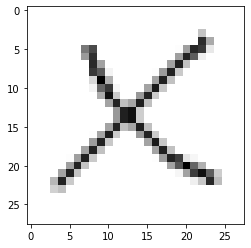

In [40]:
plt.imshow(np.array(data.iloc[1][0:-1]).reshape(28, 28), cmap='binary')

In [41]:
data.astype('int32').dtypes

0      int32
1      int32
2      int32
3      int32
4      int32
       ...  
780    int32
781    int32
782    int32
783    int32
784    int32
Length: 785, dtype: object